# Exercise 1

Work on this before the next lecture. We will talk about questions, comments, and solutions during the exercise after the second lecture.

Please do form study groups! When you do, make sure you can explain everything in your own words, do not simply copy&paste from others.

The solutions to a lot of these problems can probably be found with Google. Please don't. You will not learn a lot by copy&pasting from the internet.

If you want to get credit/examination on this course please upload your work to **your GitHub repository** for this course **before** the next lecture starts. If you worked on things together with others please add their names to the notebook so we can see who formed groups.

## Objective

There are two objectives for this set of exercises:

* get you started using python, scikit-learn, matplotlib, and GitHub. You will be using them a lot during the course, so make sure you get a good foundation to build on.

* working through the steps of opening a new dataset, plotting the data, fitting a model to it, evaluating your model, and deciding on model complexity.

## Question 0

Install python, scikit-learn (v0.18), matplotlib, jupyter and git.

Instructions for doing so: https://github.com/wildtreetech/advanced-comp-2017/blob/master/install.md

Documentation and guides for the various tools:

* [jupyter quickstart](http://jupyter.readthedocs.io/en/latest/content-quickstart.html)
* [try jupyter without installing anything](https://try.jupyter.org/)
* [matplotlib homepage](http://matplotlib.org/)
* [matplotlib gallery](http://matplotlib.org/gallery.html)
* [scikit-learn homepage](http://scikit-learn.org/stable/)
* [scikit-learn examples](http://scikit-learn.org/stable/auto_examples/index.html)
* [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
* [try git online without installing anything](https://try.github.io/levels/1/challenges/1)


### GitHub and git

* [Create a GitHub account]() for yourself or use one you already have.
* Follow the guide on [creating a new repository](https://help.github.com/articles/create-a-repo/). Name the repository "advanced-comp-2017".

Read up on `git clone`, `git pull`, `git push`, `git add` and `git commit`. Once you master these five commands you should be good for this course. There is a whole universe of complex things that `git` can do for you, don't worry about them for now. Once you feel comfortable with the basics you can always step it up later.

---

These are some useful default imports for plotting and [`numpy`](http://www.numpy.org/)

In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

---

## Question 1

In the lecture we used the nearest neighbour classifier to classify points from a toy dataset into either "red" or "blue" classes. We investigated how the performance changes as a function of model complexity and what this means for the performance of our classifier on unseen data. Instead of using a linear model as in the lecture, use a k-nearest neighbour model.

* plot your dataset
* split your dataset into a training and testing set. Comment on how you decided to split your data.
* evaluate the performance of the classifier on your training dataset.
* evaluate the performance of the classifier on your testing dataset.
* repeat the above two steps for varying splits (10-90, 20-80, 30-70, ...) and comment
  on what you see. Is there a "best" way to split your data?
* comment on why the two performance estimates agree or disagree.
* plot the accuracy of the classifier as a function of `n_neighbors`.
* comment on the similarities and differences between the performance on the testing and training dataset.
* is a KNeighbor Classifier with 4 or 10 neighbors more complicated?
* find the best setting of `n_neighbors` for this dataset.
* why is this the best setting?

Use `make_blobs(n_samples=400, centers=23, random_state=42)` to create a simple dataset and use the `KNeighborsClassifier` classifier to answer the above questions.

In [2]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

labels = ["b", "r"]
X, y = make_blobs(n_samples=400, centers=23, random_state=42)
y = np.take(labels, (y < 10))

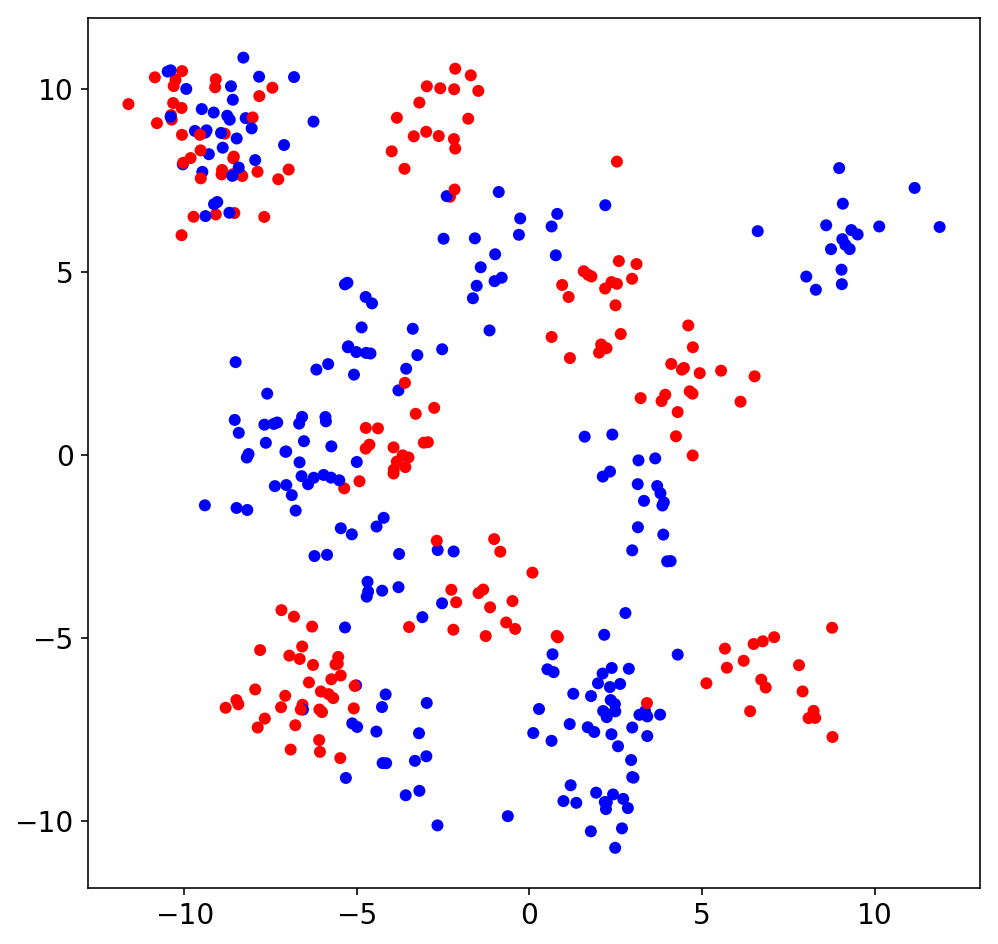

In [3]:
# Your solution
plt.scatter(X[:, 0], X[:, 1], c=y, lw=0)

/Users/thead/anaconda/envs/adv-comp-18/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Training score: 0.885
Testing score: 0.875


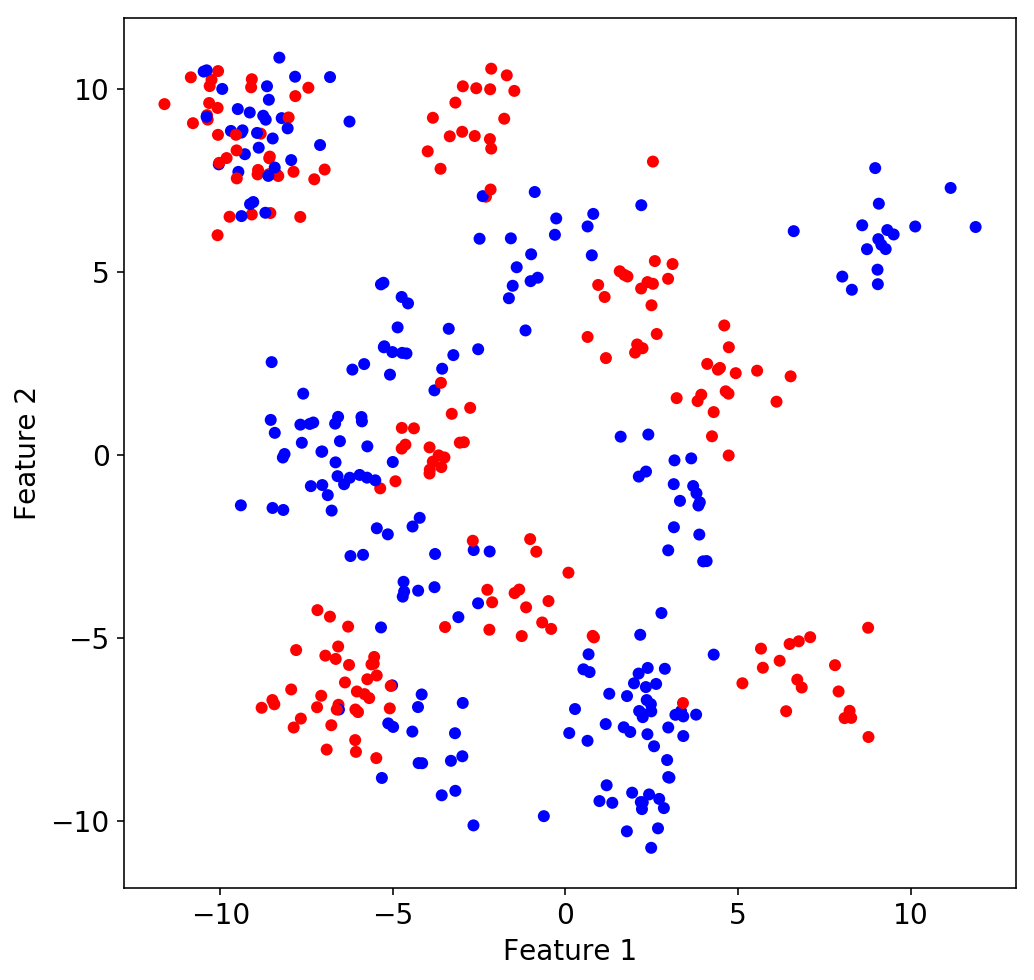

In [4]:
# Tim's solution

plt.scatter(X[:, 0], X[:, 1], c=y, lw=0)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

from sklearn.model_selection import train_test_split, validation_curve

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=243)

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

print("Training score:", clf.score(X_train, y_train))
print("Testing score:", clf.score(X_test, y_test))

In [5]:
# test score is generally lower (worse) than the training score.
# this makes sense as the classifier tries to minimize the loss when fitting to the
# training data. This means the score evaluated on the training set is an optimistic
# estimate. The test data set was not used and so can be treated as "unseen" data
# using it we obtain a fair estimate of the generalisation error of the classifier.
# As long as we do not start using the score from the testing data set to inform
# decisions about the hyper-parameters of the model.

266.6666666666667


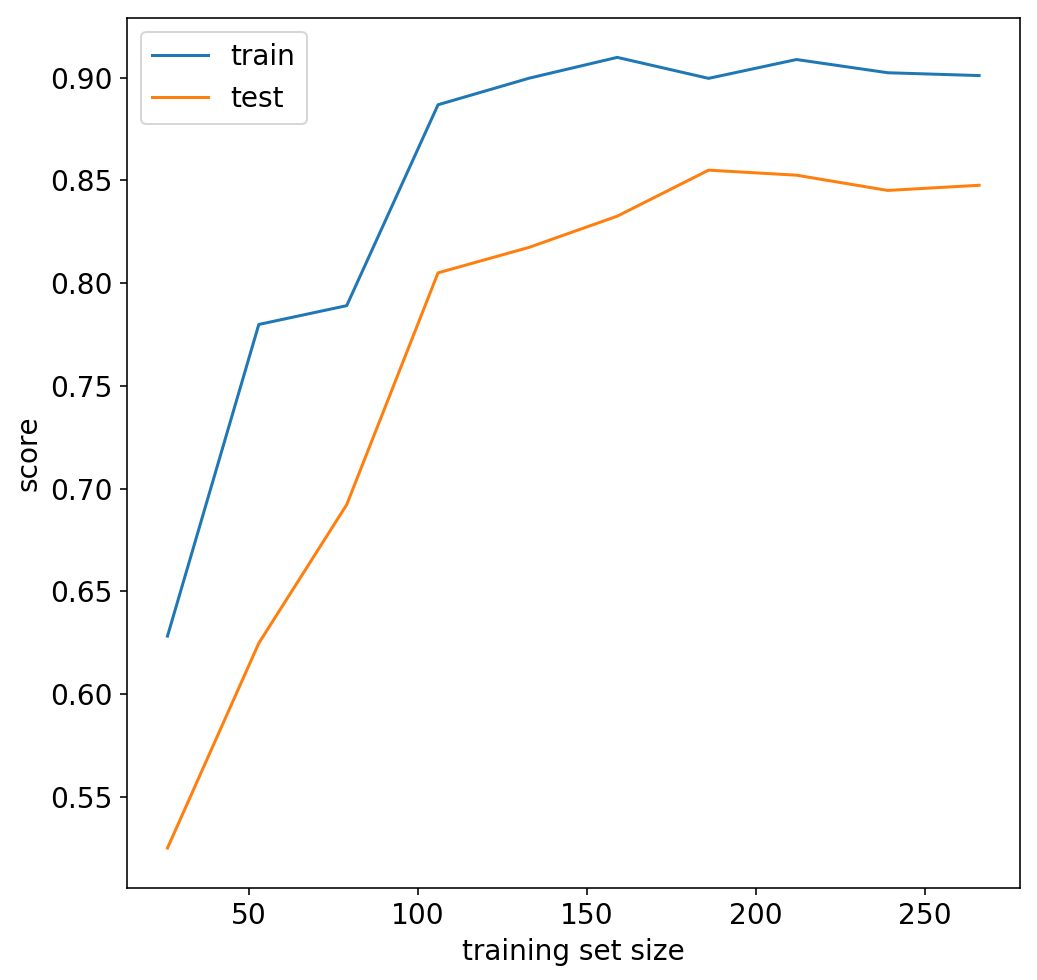

In [6]:
from sklearn.model_selection import learning_curve

# As this kind of question is very common scikit-learn
# provides a helper function to perform (nearly) this task
# It is a nice short cut compared to having to write
# the for-loop yourself.
# However, this is a slight cheat from Tim's side as it uses
# cross-validation to estimate the scores which we
# will only meet in the third lecture.
sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(), X, y,
                                                 train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                                             0.7, 0.8, 0.9, 1.])

train_scores = np.mean(train_scores, axis=1)
test_scores = np.mean(test_scores, axis=1)
plt.plot(sizes, train_scores, label="train")
plt.plot(sizes, test_scores, label="test")
plt.xlabel("training set size")
plt.ylabel("score")
plt.legend(loc='best');
# because learnign_curve uses three fold cross validation we do not
# arrive at the full training set size of 400 samples.
print(2*X.shape[0]/3)

best training score at n_neighbors= 8


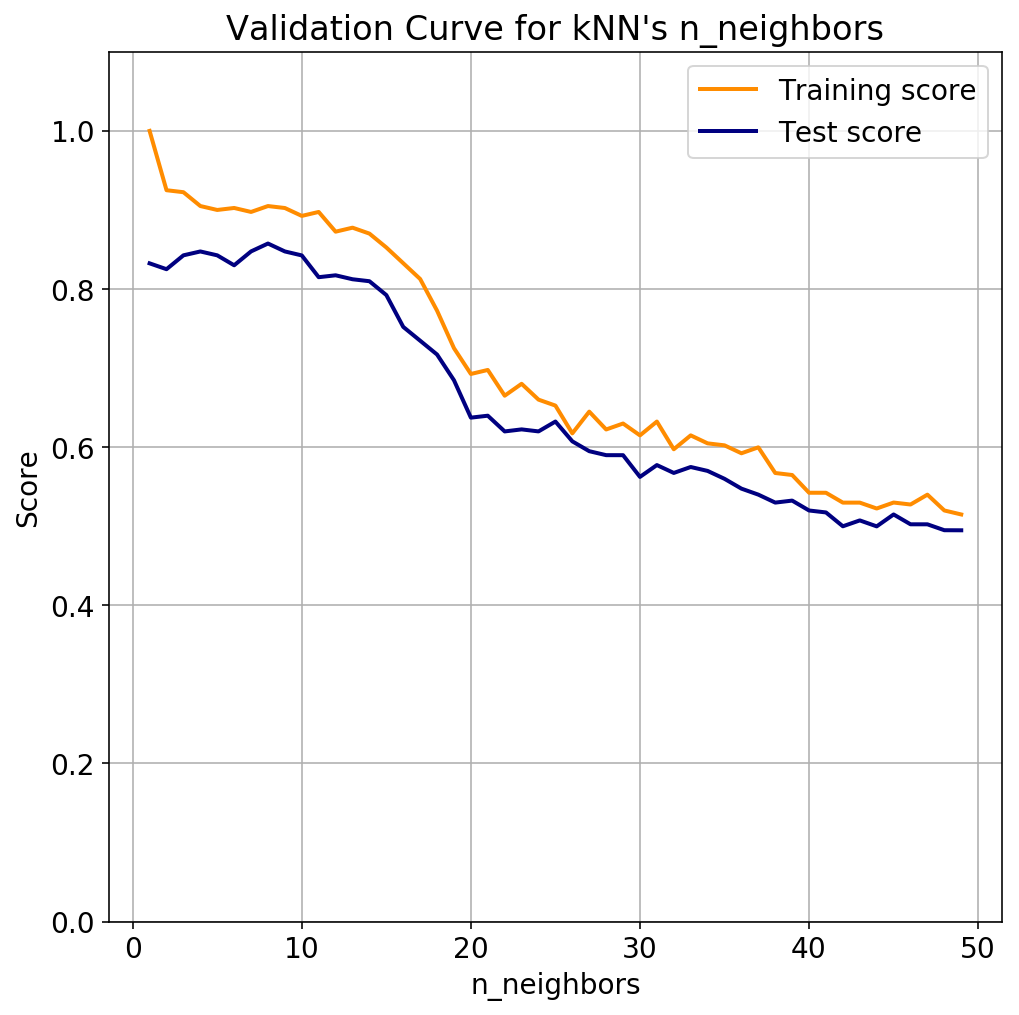

In [7]:
# validation_curve is another helper from scikit-learn
# to evaluate a model at several values of a single parameter
# 
param_range = np.arange(1, 50, 1)
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(),
    X, y, param_name="n_neighbors", param_range=param_range, cv=2
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

fig, ax = plt.subplots(1,1)
plt.title("Validation Curve for kNN's n_neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.grid()
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
         color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Test score",
         color="navy", lw=lw)
plt.legend(loc="best");
# The best setting of n_neighbors is the one that maximises
# the score on the test data set. Note that because we used
# the testing data set to pick n_neighbors the score is not
# an unbiased estimate of the generalisation error anymore.
print("best training score at n_neighbors=", param_range[np.argmax(test_scores_mean)])

---

## Question 2

This is a regression problem. It mostly follows the setup of the classification problem so you should be able to reuse some of your work.

* plot your dataset
* fit a kNN regressor with varying number of `n_neighbors` and compare each regressors predictions to the location of the training and testing points. 
* plot the mean squared error of the classifier as a function of `n_neighbors` for both training and testing datasets.
* comment on the similarities and differences between the performance on the testing and training dataset.
* find the best setting of `n_neighbors` for this dataset.
* why is this the best setting?
* can you explain why the mean square error on the training dataset plateaus between ~`n_neihgors`=5 to 15 at the value that it does?

Use `make_regression()` to create the dataset and use `KNeighborsRegressor` to answer the above questions. Take a look at scikit-learn's [`metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) module to compute the mean squared error.

In [8]:
def make_regression(n_samples=100, noise_level=0.8, random_state=2):
    rng = check_random_state(random_state)
    X = np.linspace(-2, 2, n_samples)
    y = 2 * X + np.sin(5 * X) + rng.randn(n_samples) * noise_level
    
    return X.reshape(-1, 1), y

In [9]:
# Your solution


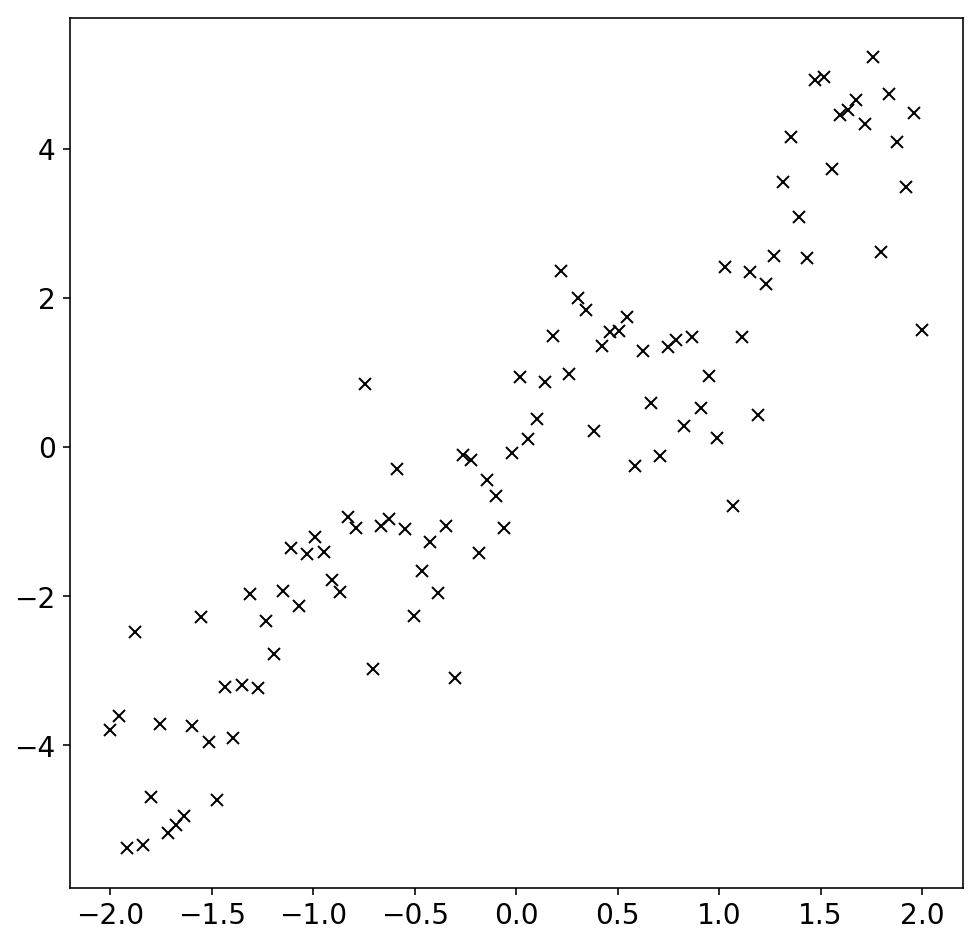

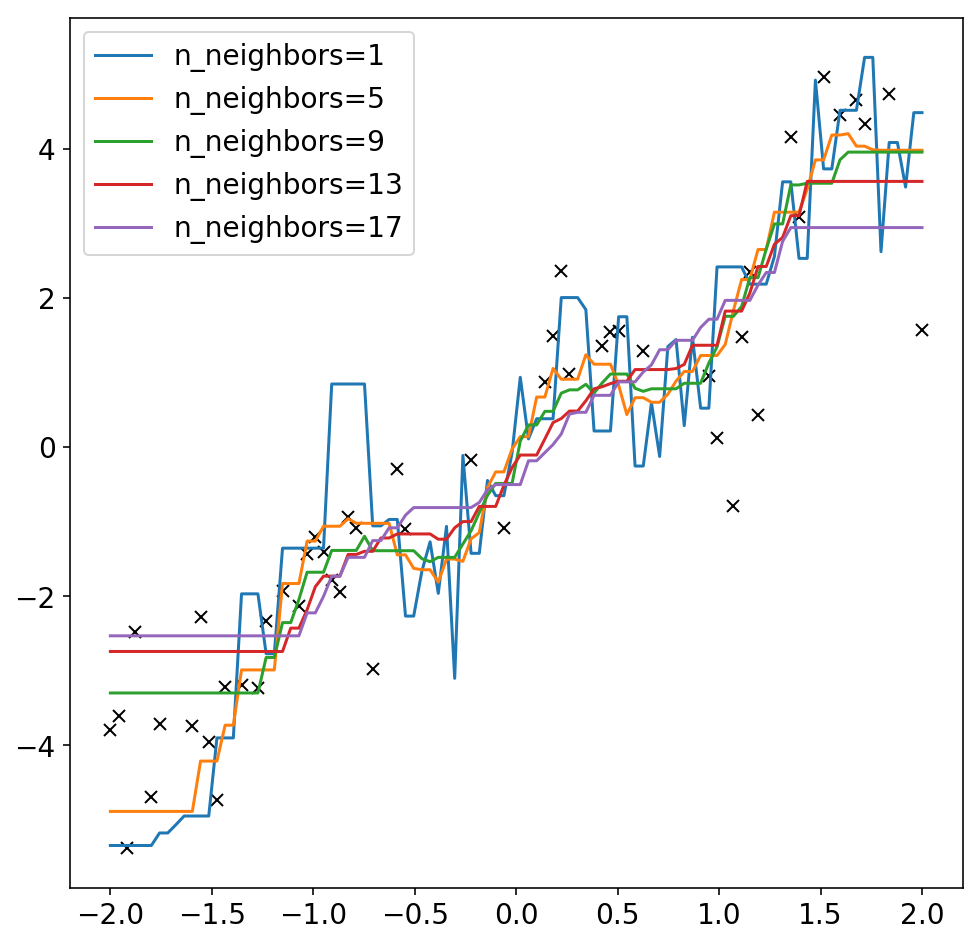

In [10]:
# Tim's solution
from sklearn.neighbors import KNeighborsRegressor

X, y = make_regression()
plt.plot(X, y, 'xk')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)
fig, ax = plt.subplots(1,1)
line = np.linspace(-2, 2, 100).reshape(-1, 1)

ax.plot(X_test, y_test, 'xk')

for n in range(1, 20, 4):
    rgr = KNeighborsRegressor(n_neighbors=n)
    rgr.fit(X_train, y_train)
    ax.plot(line, rgr.predict(line), label='n_neighbors=%i' % n);
    
plt.legend(loc='best');

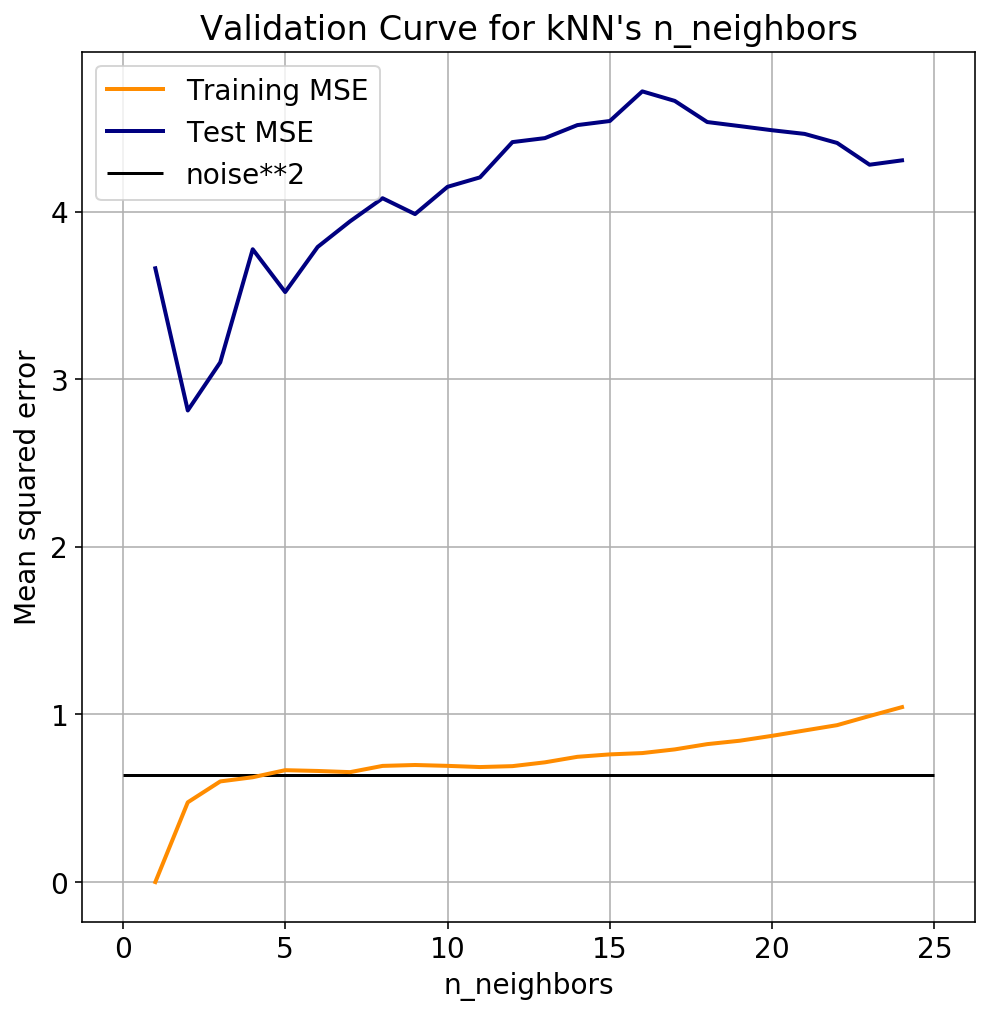

In [11]:
# what is the best value, why is there a plateau
# The parameter that maximises the test score/lowest
# test error is the best parameter to use. It appears as
# if there is a range of values that should work, we just
# pick the one at the maximum.
# The plateau is not nearly as visible as when Tim first solved
# the problem. He thinks it shows the intrinsic noise added
# to the observations. This is more a curiosity than a
# general thing.
param_range = np.arange(1, 25, 1)
train_scores, test_scores = validation_curve(
    KNeighborsRegressor(),
    X, y, param_name="n_neighbors", param_range=param_range, cv=5,
    scoring='neg_mean_squared_error'
)
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

fig, ax = plt.subplots(1,1)
plt.title("Validation Curve for kNN's n_neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("Mean squared error")
plt.hlines(0.8**2, xmin=0, xmax=25, label='noise**2')
plt.grid()
lw = 2
plt.plot(param_range, train_scores_mean, label="Training MSE",
         color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Test MSE",
         color="navy", lw=lw)
plt.legend(loc="best");

---

## Question 3

Logistic regression. Use a more complex linear model to create a two class classifier for the "circle inside a circle" problem. Think about how you can increase the complexity of a logistic regression model. Visualise the classificatio naccuracy as a function of the model complexity.

Use `make_circles(n_samples=400, factor=.3, noise=.1)` to create a simple dataset and use the `LogisticRegression` classifier to answer the above question.

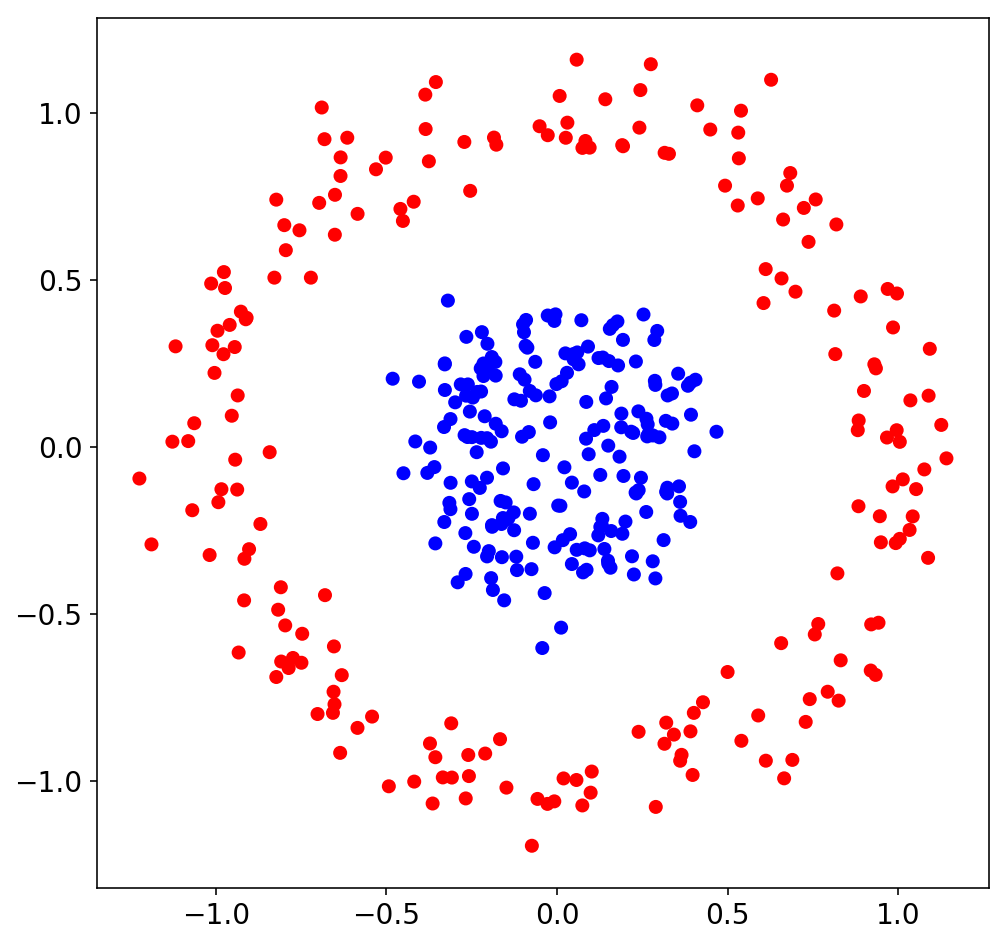

In [12]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=400, factor=.3, noise=.1)
labels = ['b', 'r']
y = np.take(labels, (y < 0.5))

plt.scatter(X[:,0], X[:,1], c=y)

In [13]:
# Your answer
from utils import plot_surface

/Users/thead/anaconda/envs/adv-comp-18/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


1 0.6
2 1.0
3 1.0
4 1.0


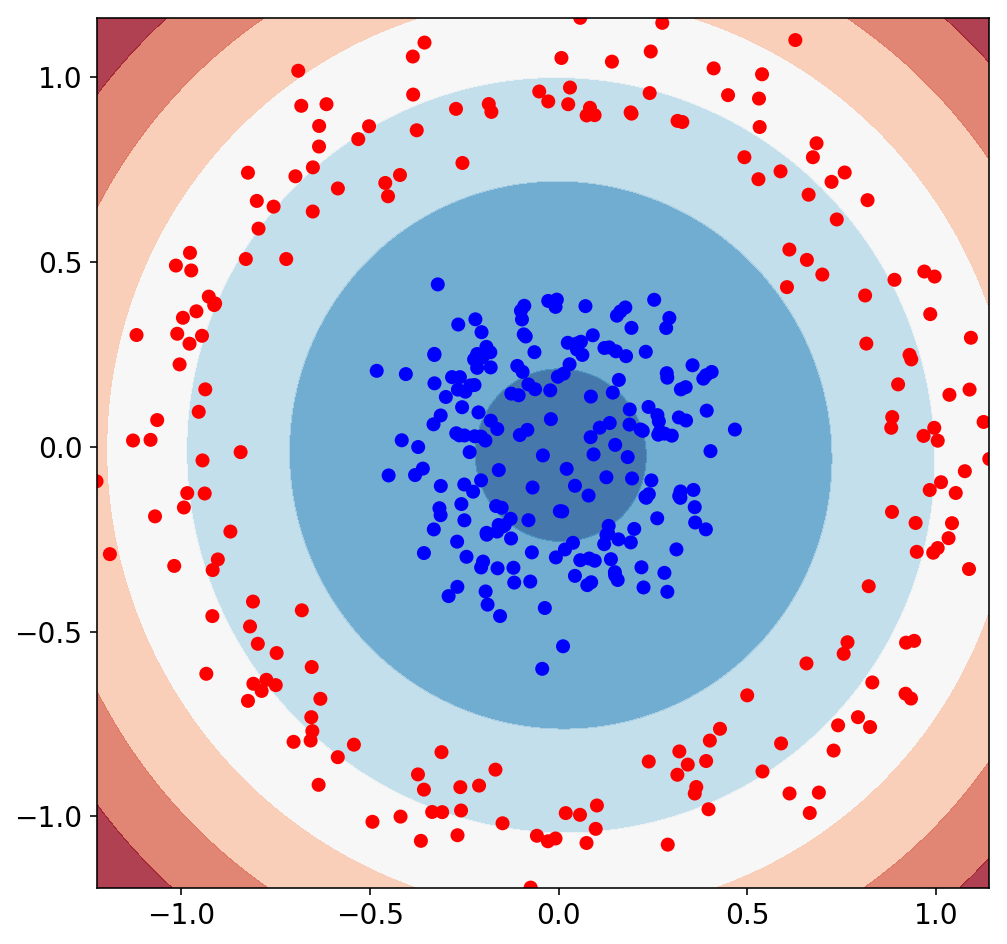

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)
for p in range(1, 5):
    clf = make_pipeline(PolynomialFeatures(p), LogisticRegression())
    clf.fit(X_test, y_test)
    print(p, clf.score(X_test, y_test))
    
clf = make_pipeline(PolynomialFeatures(2), LogisticRegression())
clf.fit(X_test, y_test)
plot_surface(clf, X, y)